In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/kunalduran/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## EDA

In [2]:
# reading dataset
df = pd.read_csv('real_estate.csv')

In [3]:
df.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [4]:
df.shape

(100, 2)

In [5]:
df.isna().sum()

price    0
size     0
dtype: int64

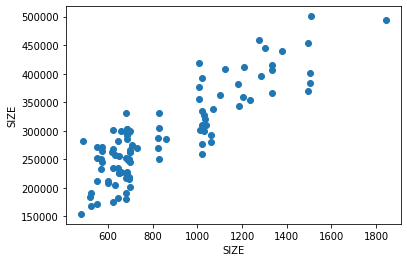

In [7]:
# df.plot(df['size'], df['price'] , kind='scatter')
plt.scatter(df['size'], df['price'])
plt.xlabel('SIZE')
plt.ylabel('SIZE')
plt.show()

In [8]:
df.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


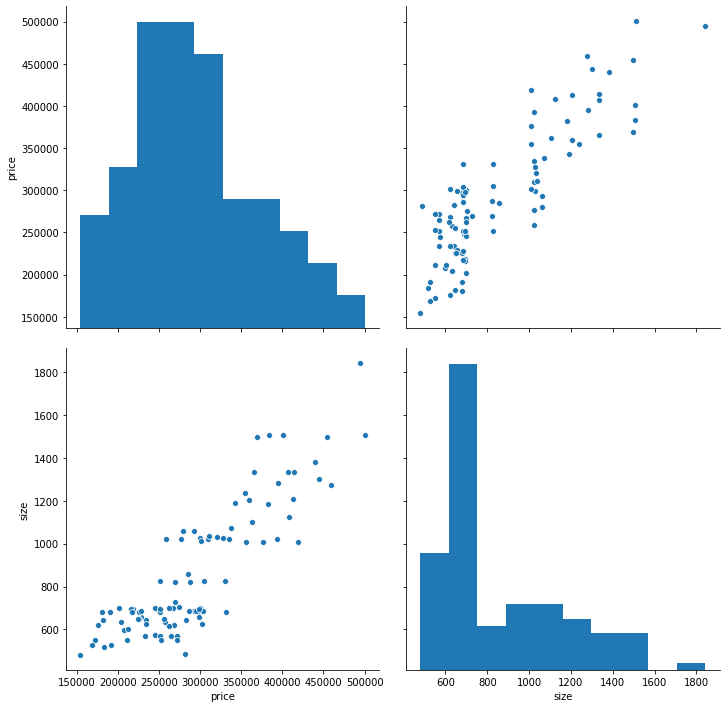

In [9]:
sns.pairplot(df, height=5)

## Data Cleaning

In [10]:
df[df['size']>1310].count()

price    10
size     10
dtype: int64

In [11]:
cleaned_df = df[df['size']<1310]

In [12]:
cleaned_df.describe()

,price,size
count,90.000000,90.000000
mean,277749.933600,784.075889
std,65040.366812,219.861581
min,154282.128000,479.750000
25%,229809.448000,635.665000
50%,270624.904000,688.010000
75%,304339.758000,1010.060000
max,458674.256000,1300.960000


(array([16., 42.,  6.,  9.,  9.,  7.,  5.,  5.,  0.,  1.]),
 array([ 479.75 ,  616.026,  752.302,  888.578, 1024.854, 1161.13 ,
        1297.406, 1433.682, 1569.958, 1706.234, 1842.51 ]),
 <a list of 10 Patch objects>)

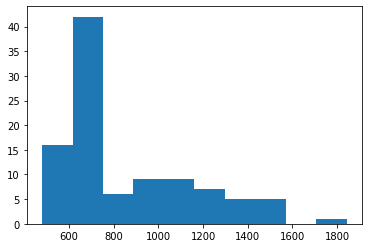

In [13]:
plt.hist(df['size'])

(array([ 9., 17., 31.,  1.,  6.,  0., 13.,  5.,  4.,  4.]),
 array([ 479.75 ,  561.871,  643.992,  726.113,  808.234,  890.355,
         972.476, 1054.597, 1136.718, 1218.839, 1300.96 ]),
 <a list of 10 Patch objects>)

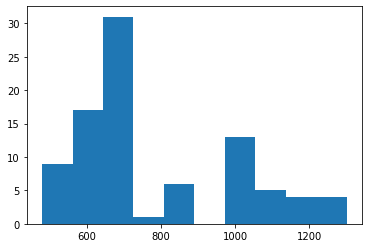

In [14]:
plt.hist(cleaned_df['size'])

## Data Transformation

In [15]:
cleaned_df['size'].skew()

0.8389006031345327

In [16]:
np.log(cleaned_df['size']).skew()

0.5304383997600514

In [17]:
np.sqrt(cleaned_df['size']).skew()

0.6899068381185791

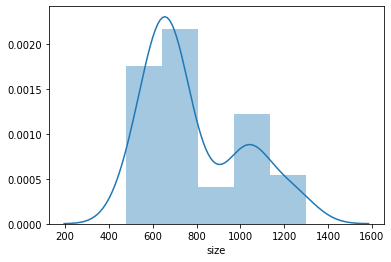

In [18]:
sns.distplot(cleaned_df['size'])

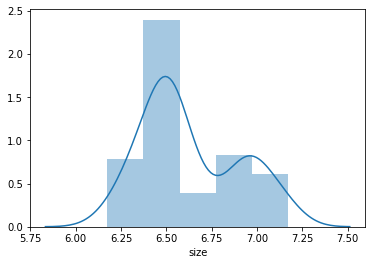

In [19]:
sns.distplot(np.log(cleaned_df['size']))

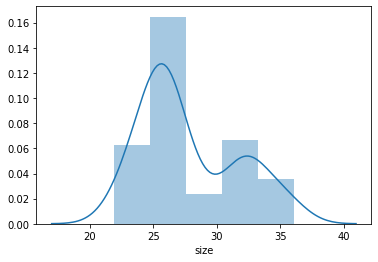

In [20]:
sns.distplot(np.sqrt(cleaned_df['size']))

# Solving with Deep Learning

### Building Model with TF & Keras

In [28]:
scaled_X

array([[-0.70816415],
       [-0.66387316],
       [-1.23371919],
       [ 2.19844528],
       [ 1.42498884],
       [-0.937209  ],
       [-0.95171405],
       [-0.78328682],
       [-0.57603328],
       [-0.53467702],
       [ 0.69939906],
       [ 3.33780001],
       [-0.53467702],
       [ 0.52699137],
       [ 1.51100715],
       [ 1.77668568],
       [-0.54810263],
       [-0.77276222],
       [-0.58004747],
       [ 0.58943055],
       [-0.78365788],
       [-1.02322731],
       [ 1.19557293],
       [-1.12884431],
       [-1.10378093],
       [ 0.84424715],
       [-0.95171405],
       [ 1.62279723],
       [-0.58004747],
       [ 2.17014356],
       [ 0.5306345 ],
       [-0.58004747],
       [-0.8606021 ],
       [-1.10378093],
       [ 0.015233  ],
       [-0.77603429],
       [-0.10057126],
       [-0.95387294],
       [-0.56517136],
       [-0.5219598 ],
       [ 0.56983186],
       [-0.57603328],
       [-0.10057126],
       [ 1.62279723],
       [ 0.69939906],
       [-0

In [21]:
X = df['size'].values
y = df['price'].values

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
y_scaler = StandardScaler()
scaler.fit(X.reshape(-1,1))
scaled_y = y_scaler.fit_transform(y.reshape(-1,1))
scaled_X = scaler.transform(X.reshape(-1,1))

In [25]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32,input_shape=(1,), activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [26]:
# optimiser= tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse', optimizer='adam',  metrics=['mae', 'mse'])

In [27]:
EPOCHS = 50
history = model.fit(scaled_X, scaled_y, verbose=2, validation_split=0.2, epochs=EPOCHS)

Epoch 1/50
3/3 - 0s - loss: 0.9632 - mae: 0.7828 - mse: 0.9632 - val_loss: 0.7314 - val_mae: 0.6938 - val_mse: 0.7314
Epoch 2/50
3/3 - 0s - loss: 0.8746 - mae: 0.7476 - mse: 0.8746 - val_loss: 0.6788 - val_mae: 0.6616 - val_mse: 0.6788
Epoch 3/50
3/3 - 0s - loss: 0.7920 - mae: 0.7146 - mse: 0.7920 - val_loss: 0.6281 - val_mae: 0.6289 - val_mse: 0.6281
Epoch 4/50
3/3 - 0s - loss: 0.7209 - mae: 0.6829 - mse: 0.7209 - val_loss: 0.5788 - val_mae: 0.5948 - val_mse: 0.5788
Epoch 5/50
3/3 - 0s - loss: 0.6541 - mae: 0.6506 - mse: 0.6541 - val_loss: 0.5354 - val_mae: 0.5610 - val_mse: 0.5354
Epoch 6/50
3/3 - 0s - loss: 0.6007 - mae: 0.6232 - mse: 0.6007 - val_loss: 0.4953 - val_mae: 0.5318 - val_mse: 0.4953
Epoch 7/50
3/3 - 0s - loss: 0.5393 - mae: 0.5937 - mse: 0.5393 - val_loss: 0.4599 - val_mae: 0.5048 - val_mse: 0.4599
Epoch 8/50
3/3 - 0s - loss: 0.4854 - mae: 0.5645 - mse: 0.4854 - val_loss: 0.4279 - val_mae: 0.4777 - val_mse: 0.4279
Epoch 9/50
3/3 - 0s - loss: 0.4405 - mae: 0.5350 - mse: 

#### Predicting 

In [29]:
def predictions(array):
    value = model.predict(scaler.transform([array]))
    return y_scaler.inverse_transform(value)

In [30]:
predictions([1504])

array([[440354.22]], dtype=float32)

#### Plotting with Matplotlib

In [31]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
45,0.255981,0.424314,0.255981,0.263671,0.432975,0.263671,45
46,0.256606,0.424866,0.256606,0.263021,0.431396,0.263021,46
47,0.256678,0.425305,0.256678,0.262208,0.430186,0.262208,47
48,0.256176,0.424934,0.256176,0.262227,0.430660,0.262227,48
49,0.256180,0.424694,0.256180,0.262772,0.432597,0.262772,49


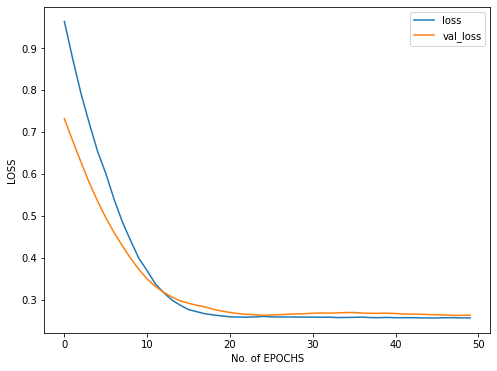

In [32]:
plt.figure(figsize=(8,6))
plt.plot(hist.epoch, hist.loss, label='loss')
plt.plot(hist.epoch, hist.val_loss, label='val_loss')
plt.xlabel('No. of EPOCHS')
plt.ylabel('LOSS')
plt.legend()

## Regression Line Plotting

In [33]:
predicted_y = model.predict(scaled_X)
predicted_y = predicted_y.flatten()

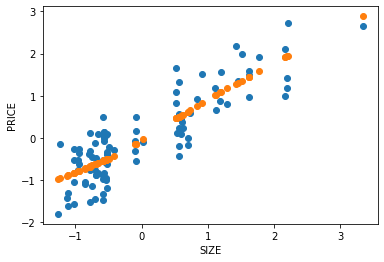

In [34]:
plt.scatter(scaled_X, scaled_y)
plt.scatter(scaled_X, predicted_y)
plt.xlabel('SIZE')
plt.ylabel('PRICE')
plt.show()

# Solving with Machine Learning (Linear Regression)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [36]:
lr = LinearRegression()
X_lr = df['size'].values.reshape(-1,1)
y_lr = df['price'].values.reshape(-1,1)
X_train, X_test, y_train, y_test  = train_test_split(X_lr, y_lr)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred = lr.predict(X_test)

In [38]:
metrics.mean_squared_error(y_test, y_pred)

1821318576.0204728

In [39]:
metrics.r2_score(y_test, y_pred)

0.70373188588149

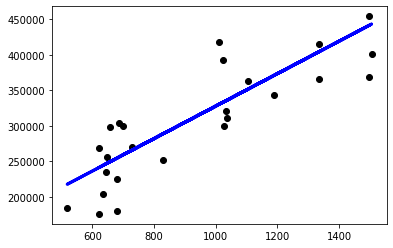

In [40]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()

plt.show()